In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf

## PCA 

In [4]:
%%bash

plink \
  --vcf /Users/cmdb/qbb2020-answers/quantlab3/BYxRM_segs_saccer3.bam.simplified.vcf \
  --pca \
  --mind \
  --allow-extra-chr

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --mind
  --pca
  --vcf /Users/cmdb/qbb2020-answers/quantlab3/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%2

In [5]:
%%bash
head plink.eigenvec

A01 01 0.0353455 0.0121191 0.0203633 0.0369758 -0.00371816 0.0383015 0.0280454 -0.00718582 0.0552279 4.30173e-05 -0.00998784 -0.00984027 -0.000946717 0.0163578 0.0189659 0.0449926 0.0187722 0.0251466 -0.0387737 0.0142384
A01 02 -0.0203733 -0.0115301 -0.00871792 -0.0703994 -0.0506287 0.0450617 -0.0699031 -0.0143431 0.0238492 0.0270039 0.0141224 0.00332691 -0.0039757 -0.0208873 -0.0326634 -0.0172422 0.0159907 -0.00790786 0.00872536 0.0139886
A01 03 -0.0172656 -0.00806361 -0.0522656 -0.0388474 -0.0382605 0.0282452 0.0462828 0.008466 0.00314205 -0.0309712 0.0150524 -0.00243935 -0.0487502 0.0479302 -0.0321832 0.00460651 -0.016738 0.00343947 -0.0637942 -0.0349545
A01 04 0.0207922 -0.0744735 -0.00745026 0.00797909 0.013607 0.02267 -0.0246187 0.0353385 -0.032396 -0.0188403 0.000669337 -0.00559284 0.00685793 0.0256263 0.0122854 0.0577782 0.021666 -0.0418856 0.0019378 -0.0437749
A01 05 -0.0319175 0.0685914 0.0250888 -0.00833838 0.0164201 0.0101749 0.0096589 -0.0512051 -0.0323806 0.030435 -0.0067

In [2]:
pca_output = pd.read_csv('plink.eigenvec', sep = ' ', header = None)
pca_output.columns = ['FID', 'SID' , 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']
pca_output

,FID,SID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,A01,1,0.035345,0.012119,0.020363,0.036976,-0.003718,0.038301,0.028045,-0.007186,...,-0.009988,-0.009840,-0.000947,0.016358,0.018966,0.044993,0.018772,0.025147,-0.038774,0.014238
1,A01,2,-0.020373,-0.011530,-0.008718,-0.070399,-0.050629,0.045062,-0.069903,-0.014343,...,0.014122,0.003327,-0.003976,-0.020887,-0.032663,-0.017242,0.015991,-0.007908,0.008725,0.013989
2,A01,3,-0.017266,-0.008064,-0.052266,-0.038847,-0.038261,0.028245,0.046283,0.008466,...,0.015052,-0.002439,-0.048750,0.047930,-0.032183,0.004607,-0.016738,0.003439,-0.063794,-0.034954
3,A01,4,0.020792,-0.074473,-0.007450,0.007979,0.013607,0.022670,-0.024619,0.035339,...,0.000669,-0.005593,0.006858,0.025626,0.012285,0.057778,0.021666,-0.041886,0.001938,-0.043775
4,A01,5,-0.031918,0.068591,0.025089,-0.008338,0.016420,0.010175,0.009659,-0.051205,...,-0.006765,-0.012257,0.014609,-0.034157,-0.011838,0.025975,0.009821,0.030508,-0.011105,0.034869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.028258,0.029521,0.073246,0.007986,-0.023496,0.002155,-0.015471,-0.016469,...,-0.034350,-0.016404,-0.033016,0.025895,0.022025,0.021827,-0.000942,-0.013724,0.036798,0.037410
947,A11,93,-0.013469,-0.003927,-0.047575,-0.030728,-0.045670,0.016102,-0.035031,-0.048079,...,-0.007580,-0.020664,-0.011800,0.022192,0.014543,0.014683,-0.002665,-0.009335,0.020004,0.001750
948,A11,94,-0.000906,0.063399,0.005936,-0.000015,0.007514,-0.045466,0.020304,-0.008391,...,0.082074,0.032907,-0.035074,0.058970,0.040479,-0.038558,0.029731,-0.057467,-0.015875,-0.017111
949,A11,95,-0.002879,0.053984,0.013385,-0.003550,0.038551,-0.045108,0.005051,0.003467,...,0.010656,-0.029883,-0.024035,0.025607,-0.015668,0.012360,0.011888,0.017862,0.030352,0.055357


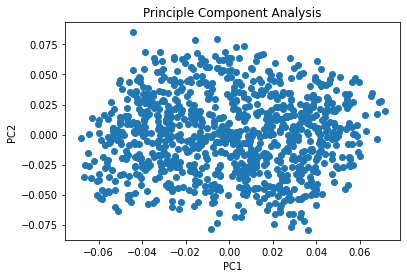

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output['PC1'], y = pca_output['PC2'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Principle Component Analysis')
plt.show()

## Allelic Frequency

In [4]:
file = open('./BYxRM_segs_saccer3.bam.simplified.vcf', 'r')
af = []
for line in file:
    if line[0] is '#':
        continue
    else:
        info = line.split('\t')
        AF = info[7][3:]
        af.append(AF)
af2 = []
for item in af:
    if ',' in item:
    #split on ',' for items with multiple values
        sep = item.split(',')
        #extract each value separately and append to a list
        val1 = float(sep[0])
        val2 = float(sep[1])
        af2.append(val1)
        af2.append(val2)           
    else:
        val3 = float(item)
        af2.append(val3)
#print(af2)        
file.close()    
        

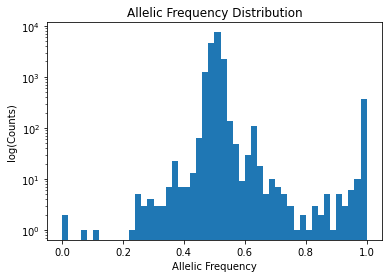

In [8]:
fig, ax = plt.subplots()
ax.hist(x= af2, bins = 50)
ax.set_yscale('log')
ax.set_xlabel('Allelic Frequency')
ax.set_ylabel('log(Counts)')
ax.set_title('Allelic Frequency Distribution')
plt.show()

## Reformat vcf and phenotype file

In [464]:
%%bash
awk '{gsub(/chrXVI/, "16"); 
      gsub(/chrXV/, "15"); 
      gsub(/chrXIV/, "14");
      gsub(/chrXIII/, "13"); 
      gsub(/chrXII/, "12"); 
      gsub(/chrXI/, "11"); 
      gsub(/chrX/, "10"); 
      gsub(/chrIX/, "9"); 
      gsub(/chrVIII/, "8");
      gsub(/chrVII/, "7"); 
      gsub(/chrVI/, "6"); 
      gsub(/chrV/, "5");
      gsub(/chrIV/, "4"); 
      gsub(/chrIII/, "3"); 
      gsub(/chrII/, "2");
      gsub(/chrI/, "1");
      gsub(/chrM/, "M");
      print;}' BYxRM_segs_saccer3.bam.simplified.vcf > num_chr.vcf

In [465]:
phen = open('phenotypes.txt', 'w')
header =0
with open('./BYxRM_PhenoData.txt' , 'r') as phenotypes:
    for line in phenotypes:
        if header == 0:
            fields = line.split('\t')
            fields[0] = 'SID'
            fields.insert(0, 'FID')
            header2 = ''
            for name in fields:
                if header2 == '':
                    header2 = header2 + name
                    continue
                else:
                    header2 = header2 + '\t' + name
            phen.write(header2)
            header = 1
            continue
        newline = line.replace('_', '\t')
        phen.write(newline)
    
phen.close()  
phenotypes.close()

## Linear regression analysis

In [466]:
%%bash
plink \
  --vcf ./num_chr.vcf \
  --pheno ./phenotypes.txt \
  --all-pheno \
  --linear \
  --allow-no-sex \
  --covar plink.eigenvec \
  --covar-number 1-10 \

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno ./phenotypes.txt
  --vcf ./num_chr.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%

## Manhattan Plots

In [467]:
line_fil = glob.glob('./*assoc.linear')

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


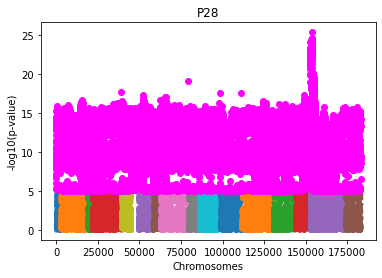

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


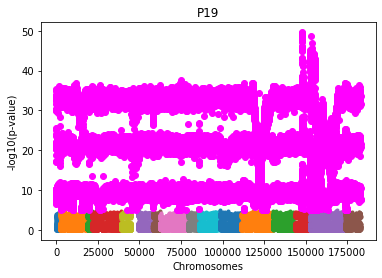

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


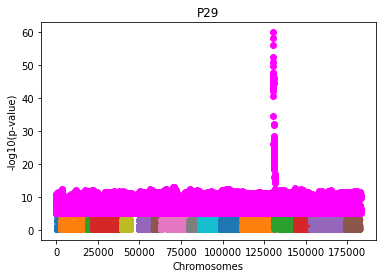

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


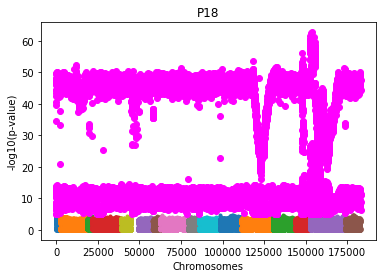

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


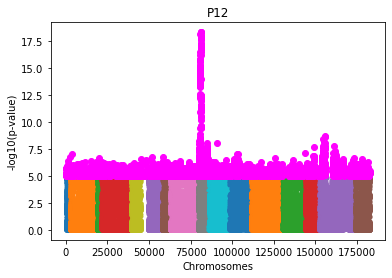

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


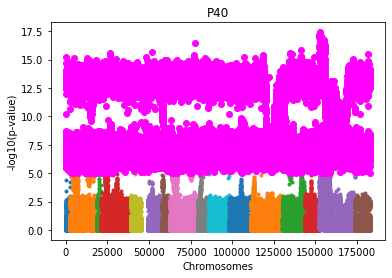

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


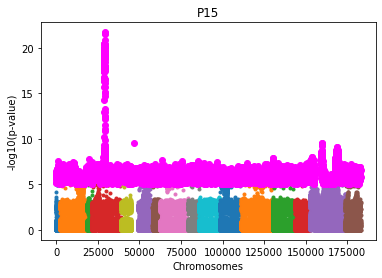

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


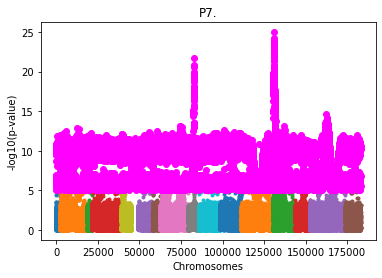

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


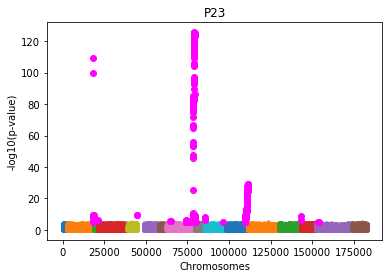

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


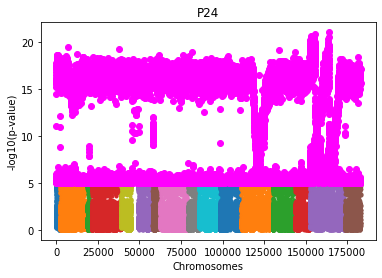

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


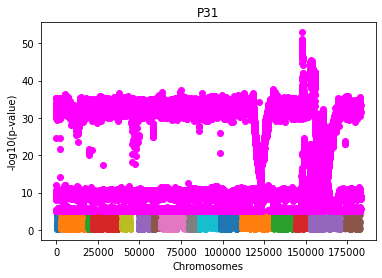

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


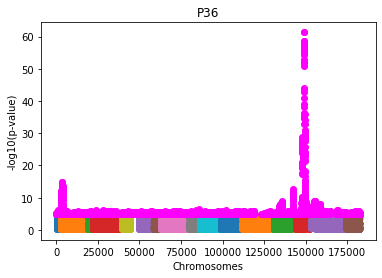

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


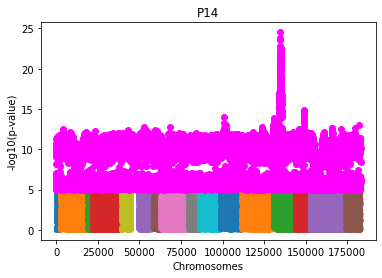

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


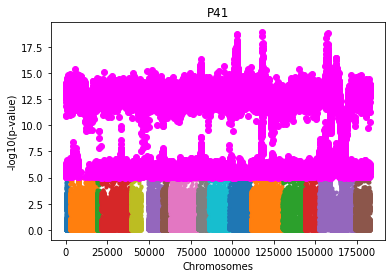

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


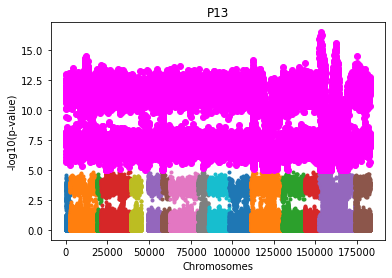

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


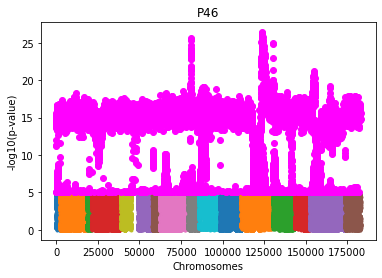

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


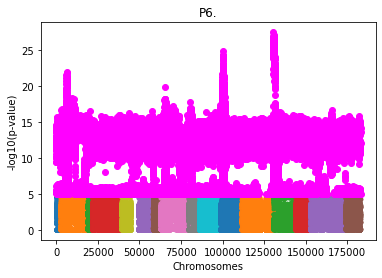

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


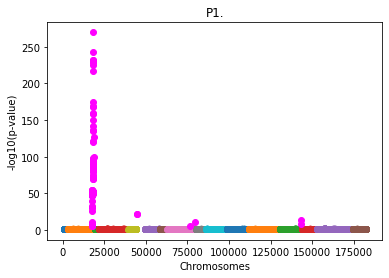

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


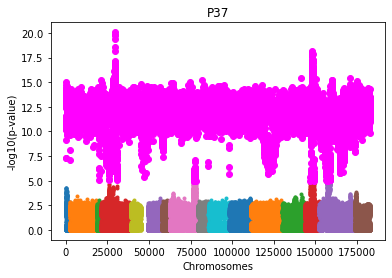

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


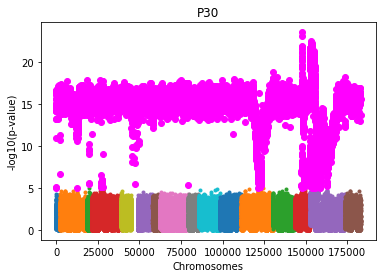

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


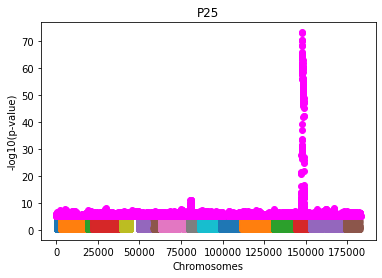

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


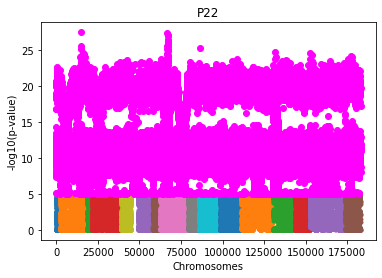

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


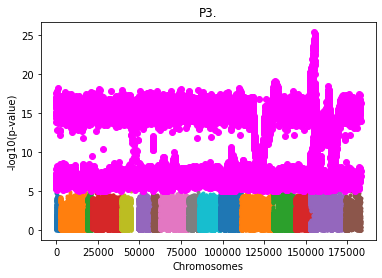

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


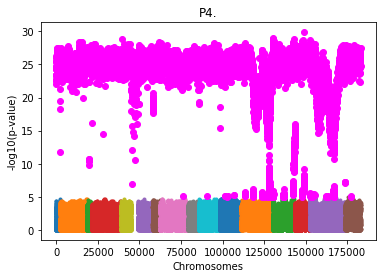

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


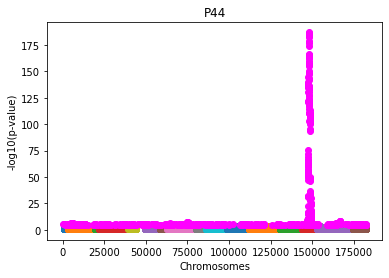

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


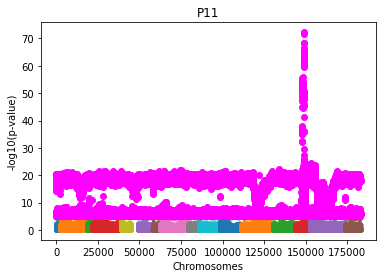

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


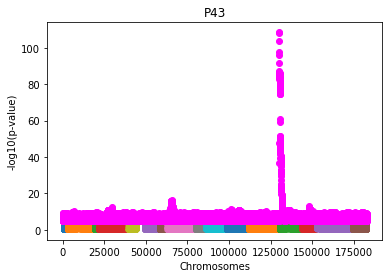

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


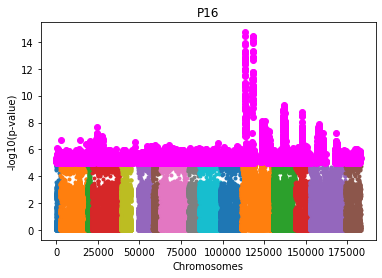

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


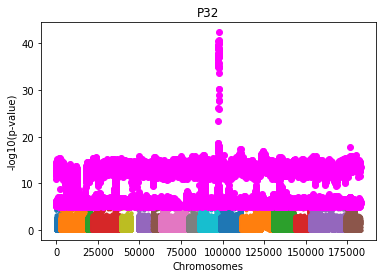

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


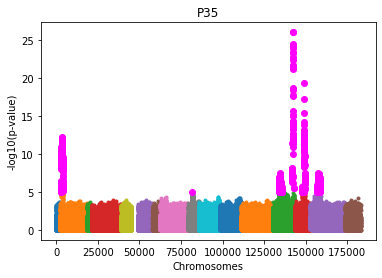

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


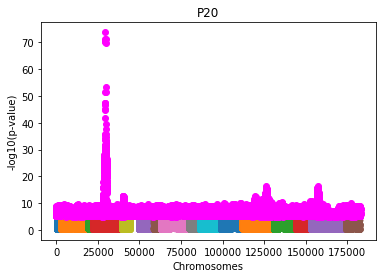

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


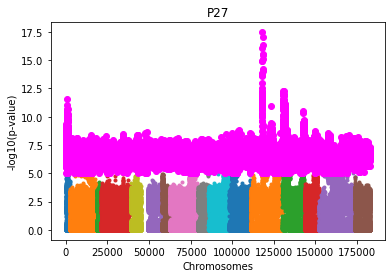

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


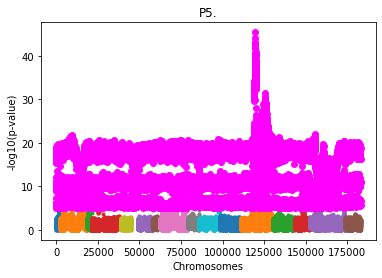

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


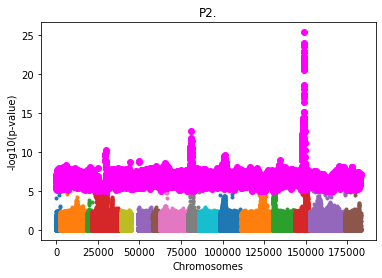

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


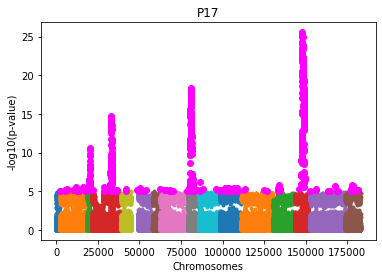

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


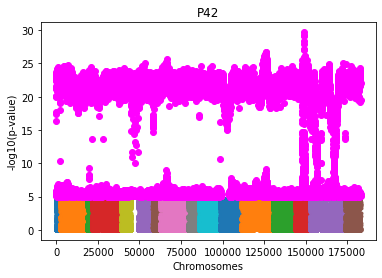

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


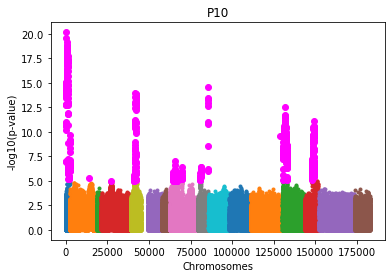

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


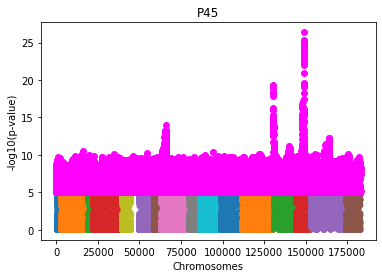

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


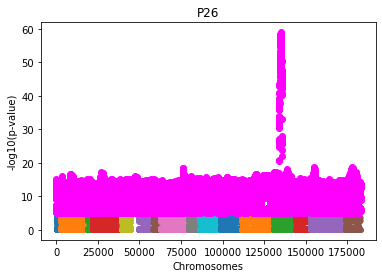

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


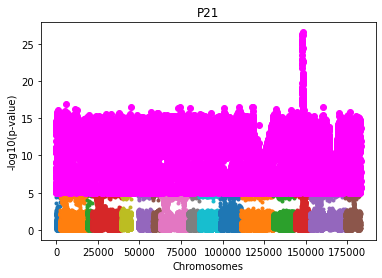

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


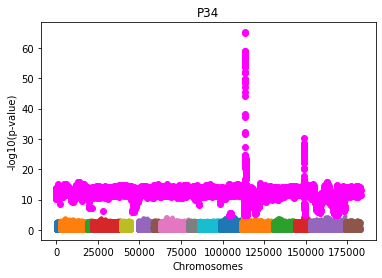

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


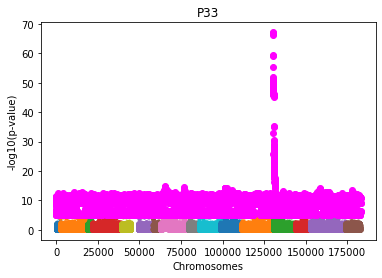

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


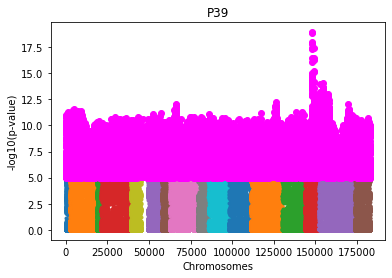

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


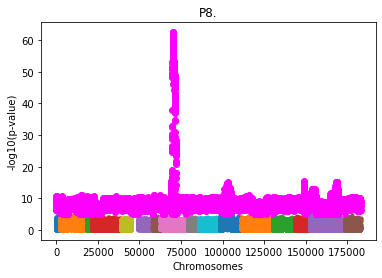

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


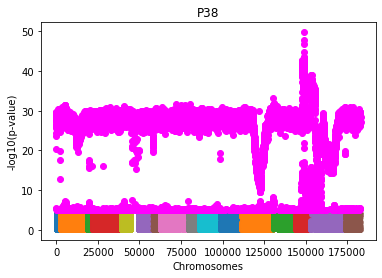

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


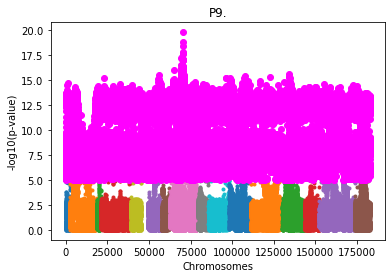

In [529]:
for assoc in lin_fil:
    gwas = pd.read_csv(assoc, sep = '\s+')
    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))

    gwas['snp_index'] = range(len(gwas))
    
    fig, ax = plt.subplots()
     
    for chr in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 'M']: 
        ax.scatter(gwas["snp_index"][gwas["CHR"] == chr], gwas["logP"][gwas["CHR"] == chr], marker = '.')
    significant = gwas.loc[:,'P'] < 0.00001
    df_sig = gwas.loc[significant, :]
    ax.scatter(df_sig['snp_index'], df_sig["logP"], c = 'magenta')
    plt.xlabel("Chromosomes")
    plt.ylabel("-log10(p-value)")
    plt.title(assoc[8:11])
    plt.show()

## QQ Plots

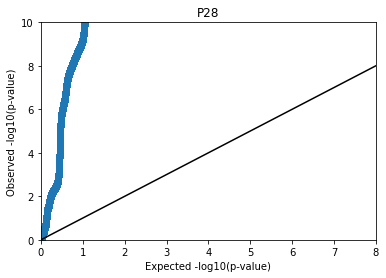

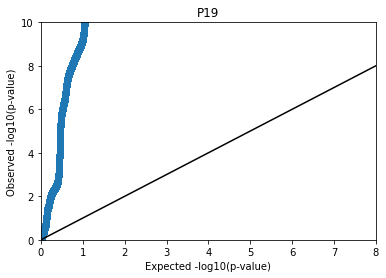

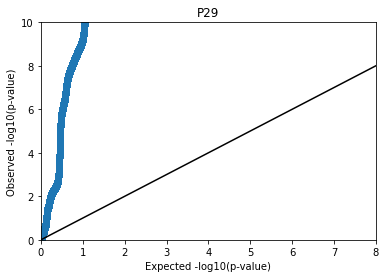

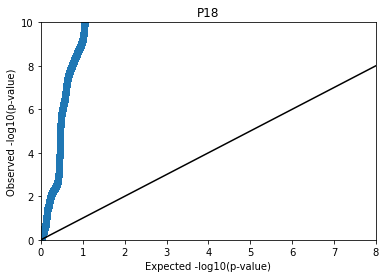

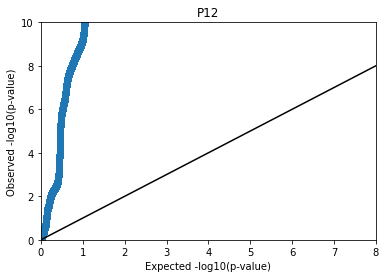

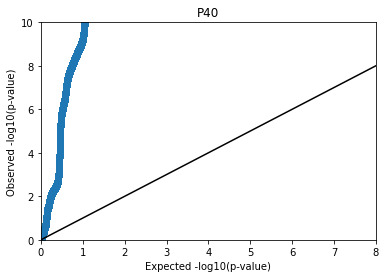

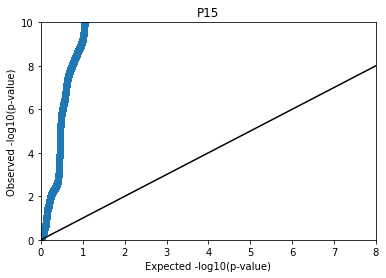

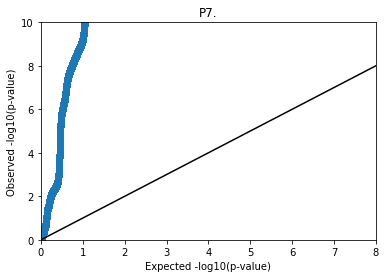

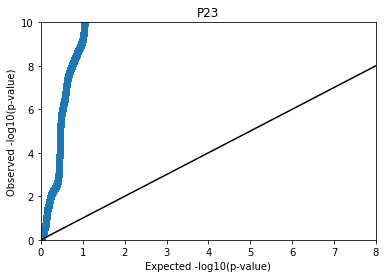

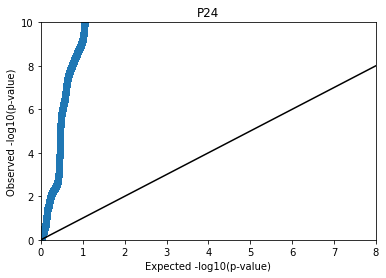

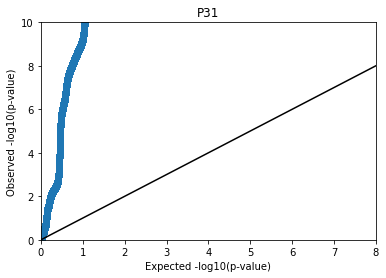

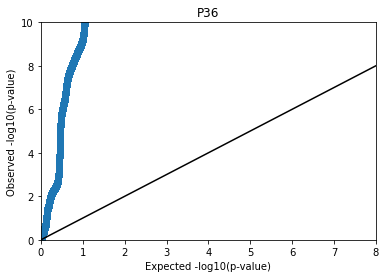

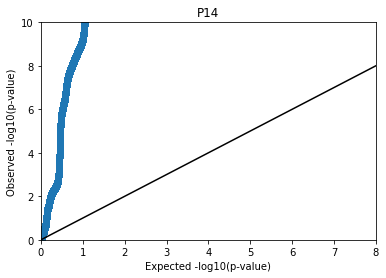

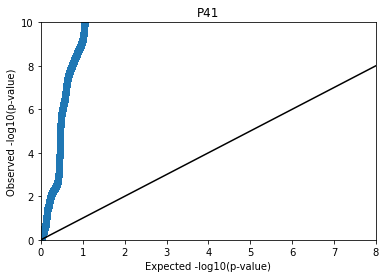

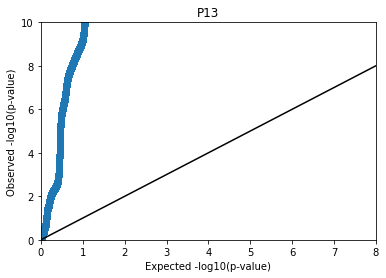

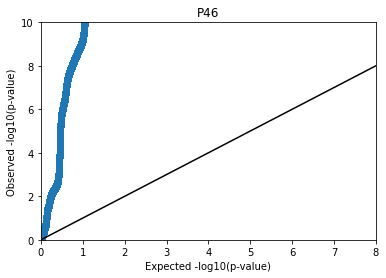

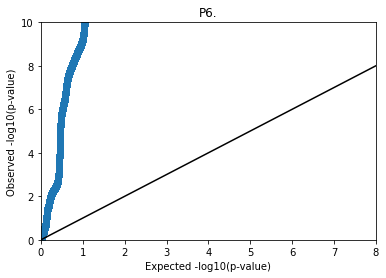

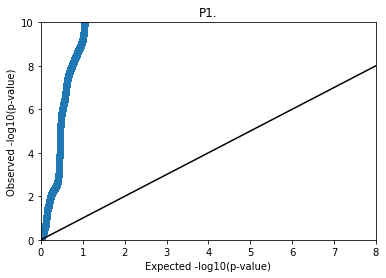

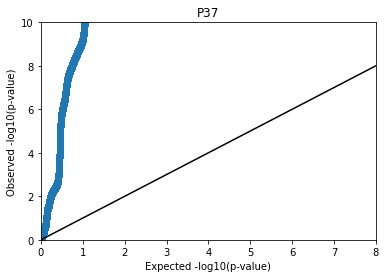

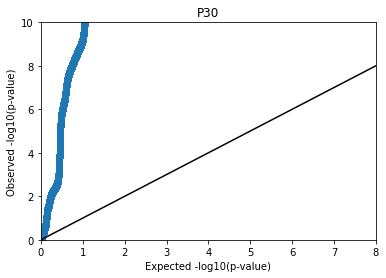

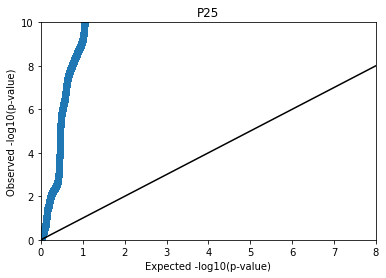

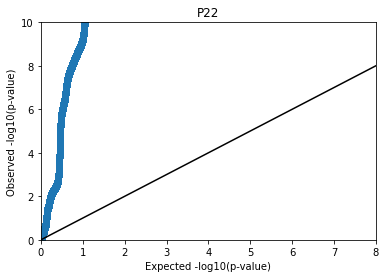

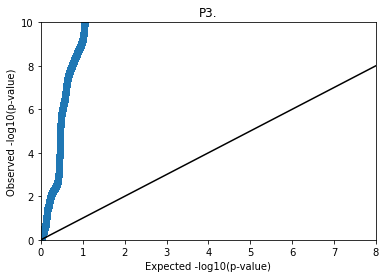

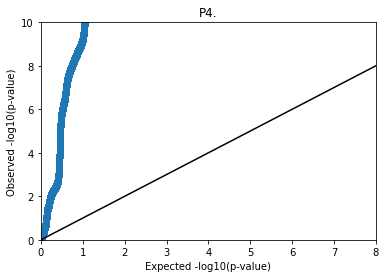

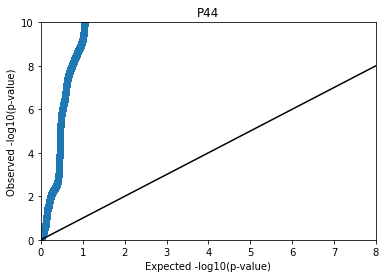

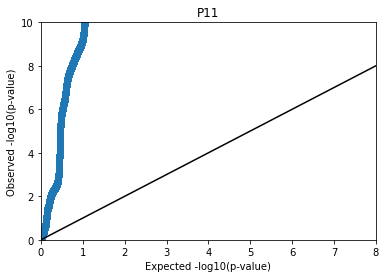

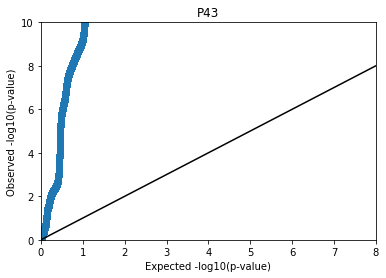

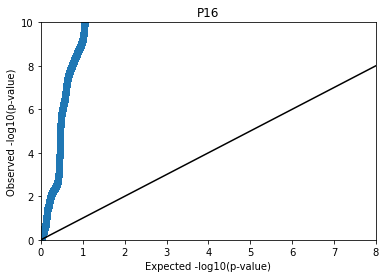

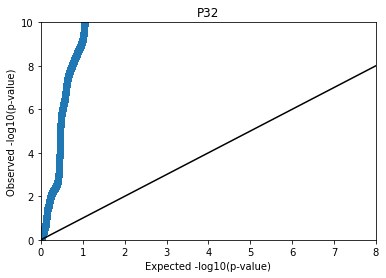

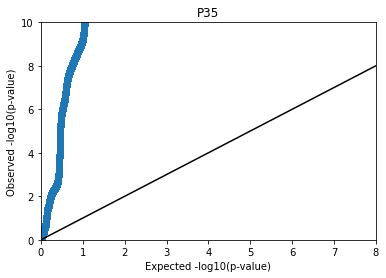

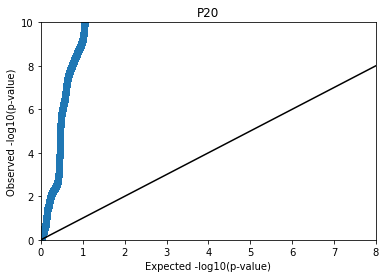

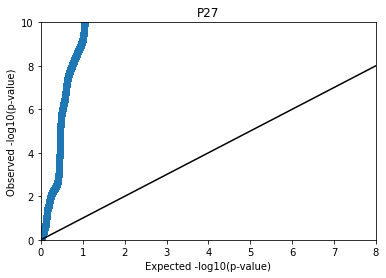

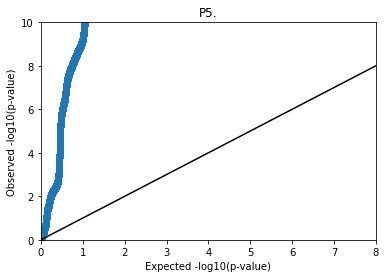

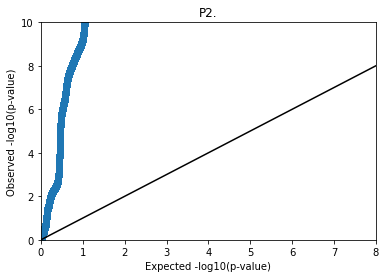

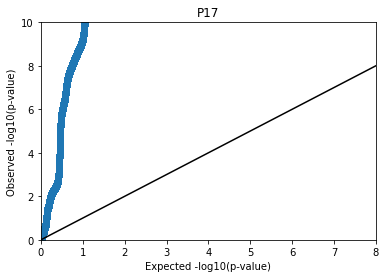

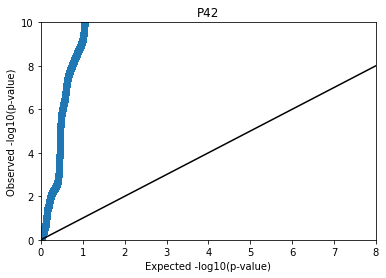

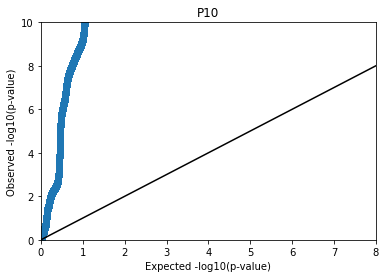

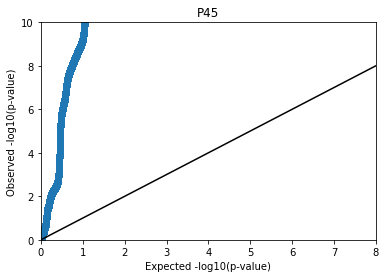

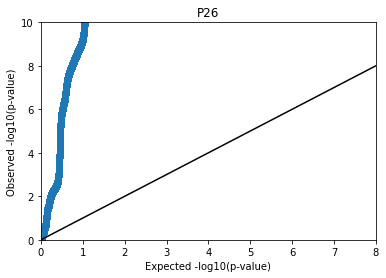

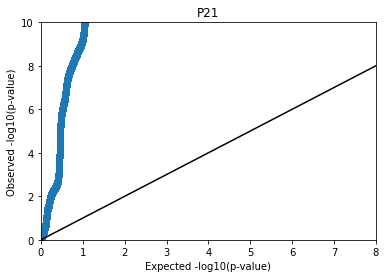

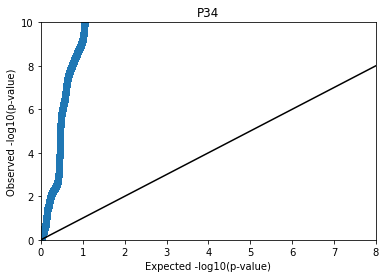

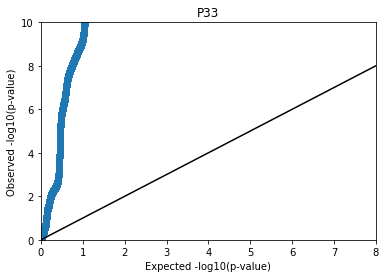

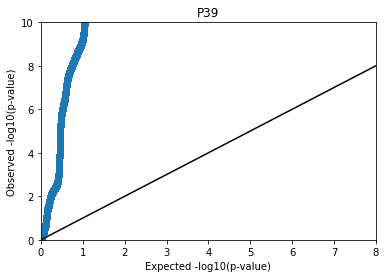

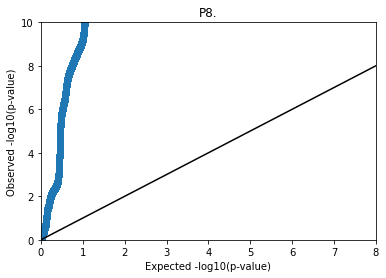

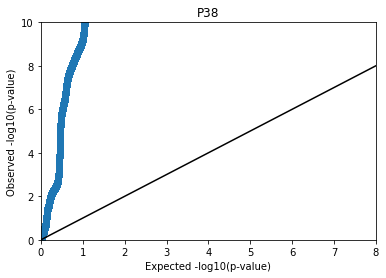

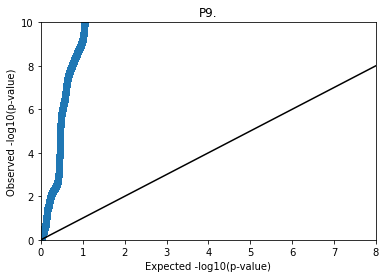

In [470]:
for assoc in lin_fil:
    gwas_sorted = gwas.sort_values(by = "P")
    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
    gwas['snp_index'] = range(len(gwas))

    fig, ax = plt.subplots()

    ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    ax.plot([8,0], [8, 0], color = "black")

    plt.xlim([0, 8])
    plt.ylim([0, 10])
    plt.xlabel("Expected -log10(p-value)")
    plt.ylabel("Observed -log10(p-value)")
    plt.title(assoc[8:11])
    plt.show()

### Explore SNPs based on significance

In [83]:
gwas = pd.read_csv('./plink.P1.assoc.linear', sep = '\s+')
gwas

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P
0,chrI,.,1074,C,ADD,676,-0.5976,-1.62200,0.10540
1,chrI,.,1074,C,COV1,676,10.2300,1.40100,0.16160
2,chrI,.,1074,C,COV2,676,6.8520,0.95190,0.34150
3,chrI,.,1074,C,COV3,676,-8.6080,-1.15900,0.24680
4,chrI,.,1074,C,COV4,676,-9.3770,-1.26300,0.20710
...,...,...,...,...,...,...,...,...,...
182859,chrXVI,.,942826,G,COV6,675,18.5200,2.49300,0.01291
182860,chrXVI,.,942826,G,COV7,675,-8.4760,-1.11900,0.26350
182861,chrXVI,.,942826,G,COV8,675,-10.7900,-1.44300,0.14960
182862,chrXVI,.,942826,G,COV9,675,4.7350,0.63920,0.52290


In [91]:
gwas_sort = gwas.sort_values(by = 'P')
gwas_sort

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P
18447,chrII,.,795756,C,ADD,706,-5.762,-58.53,1.300000e-270
18458,chrII,.,798782,A,ADD,713,-5.621,-52.27,4.736000e-244
18469,chrII,.,799317,A,ADD,707,-5.574,-50.16,3.872000e-233
18480,chrII,.,799991,G,ADD,712,-5.567,-49.79,3.325000e-232
18513,chrII,.,800746,C,ADD,720,5.521,49.16,1.957000e-230
...,...,...,...,...,...,...,...,...,...
182089,chrXVI,.,890346,T,COV6,673,NaN,NaN,NaN
182090,chrXVI,.,890346,T,COV7,673,NaN,NaN,NaN
182091,chrXVI,.,890346,T,COV8,673,NaN,NaN,NaN
182092,chrXVI,.,890346,T,COV9,673,NaN,NaN,NaN


## Exploring SNP effect size

In [524]:
file = open('./num_chr.vcf', 'r')
head = []
info = []
for line in file:
    if '#CHROM' in line:
        #separate out sample IDs from header
        header = line.rstrip().split('\t')
        head.append(header[9:])
    else:
        #isolate SNP of interest
        if 'chrII' and '795756' in line:
            oi= line.split('\t')
            info.append(oi[9:])
#Make list of GTs
genotypes = []
for samp in info[0]:
    GT = samp[0:3]
    genotypes.append(GT)
file.close()
#print(len(head))    
#print(len(genotypes))
#Make list of GT values into a DataFrame
df = pd.DataFrame(data = genotypes)
#Add sample IDs to DataFrame
df['sample']= head[0]
#df


In [526]:
#load phenotype data into its own dataframe and isolate cadmium phenotype
allphen = pd.read_csv('./BYxRM_PhenoData.txt', sep = '\s+')
cad = allphen.iloc[:,0]
cad = pd.DataFrame(cad).rename_axis('sample')
#cad

In [525]:
#merge genotype and phenotype dfs on sample id
assoc = pd.merge(df, cad, on = 'sample')
#assoc


,0,sample,Cadmium_Chloride
0,0/0,A01_01,-7.323520
1,0/0,A01_02,-8.098236
2,1/1,A01_03,7.605720
3,0/0,A01_04,-6.147649
4,1/1,A01_05,9.379060
...,...,...,...
1003,0/0,A11_92,-4.262720
1004,0/0,A11_93,-10.147285
1005,1/1,A11_94,NaN
1006,1/1,A11_95,NaN


In [491]:
#remove sample ID
assoc.pop('sample')

0       A01_01
1       A01_02
2       A01_03
3       A01_04
4       A01_05
         ...  
1003    A11_92
1004    A11_93
1005    A11_94
1006    A11_95
1007    A11_96
Name: sample, Length: 1008, dtype: object

In [515]:
#separate datafreame based on genotype using boolean indexing
CC = assoc.iloc[:, 0] == '0/0'
CG = assoc.iloc[:, 0] == '0/1'
GG = assoc.loc[:,0] == '1/1'

CC = assoc.loc[CC, :]
#remove any nan values
CC = CC[CC['Cadmium_Chloride'].notna()]
CG = assoc.loc[CG, :]
CG = CG[CG['Cadmium_Chloride'].notna()]
GG = assoc.loc[GG, :]
GG = GG[GG['Cadmium_Chloride'].notna()]

In [521]:
#convert phenotype values into list
ccval = CC['Cadmium_Chloride'].tolist()
cgval = CG['Cadmium_Chloride'].tolist()
ggval = GG['Cadmium_Chloride'].tolist()

#create dictionary using genotype as keys and phenotype as values
gen_dict = {}
gen_dict['CC'] = ccval
gen_dict['CG'] = cgval
gen_dict['GG'] = ggval

gen_dict


{'CC': [-7.32351970578731,
  -8.09823582391425,
  -6.147648701043099,
  -7.229972419792769,
  -7.58547633704237,
  -7.89098174031677,
  -8.1441306562098,
  -1.3692446592042398,
  -6.128808382728,
  -5.84546012875795,
  -6.435933716718861,
  -1.74441621576143,
  -6.25229326692405,
  -6.362380233686889,
  -5.88859656357854,
  -6.29480699992117,
  -6.78641877360553,
  -6.398361282520959,
  -7.99635930639596,
  -7.0612532198211095,
  -7.06314679239182,
  -8.377797424566861,
  -5.67423179081819,
  -6.23566188410748,
  -6.886115652699639,
  -6.85782128913466,
  -4.2682871155296995,
  -6.20678392995085,
  -5.892922018736139,
  -6.05538986666491,
  -7.38996752183815,
  -7.26714682909263,
  -6.279996267298269,
  -6.257115460519941,
  -6.62489996909742,
  -4.24207145430539,
  -6.39502501879822,
  -8.87521903550105,
  -6.4361631134774,
  -6.260280843930611,
  -7.19366598672982,
  -6.81646076673034,
  -6.58755086498097,
  -6.61148097919508,
  -5.92095360250103,
  -7.27300457339194,
  -5.6067580582

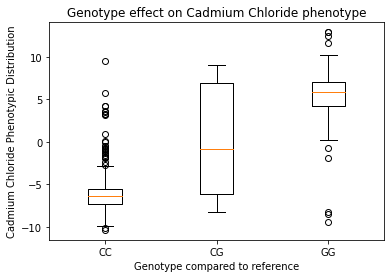

In [522]:
fig, ax = plt.subplots()
#plot using keys as lables
ax.boxplot(gen_dict.values(), labels = gen_dict.keys())
ax.set_xlabel('Genotype compared to reference')
ax.set_ylabel('Cadmium Chloride Phenotypic Distribution')
ax.set_title('Genotype effect on Cadmium Chloride phenotype')
plt.show()